In [ ]:
import torch
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

# Add the parent directory to the Python path - bad practice, but it's just for the example
import sys
sys.path.append("..")

from src.glocal_analysis import run_analysis 
from src.datasets.flood_dataset import FloodDataset
from src.datasets.DLR_dataset import DatasetDLR
from src.plot_crp_explanations import plot_explanations, plot_one_image_explanation
from src.minio_client import MinIOClient
from LCRP.models import get_model 
from LCRP.utils.pidnet_canonizers import CanonizerPIDNet



In [8]:
# Define transformation (if needed)
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to tensor
])
# Load dataset
root_dir = "../datasets/data/General_Flood_v3/"
dataset = FloodDataset(root_dir=root_dir, split="train", transform=transform)

model_name = "pidnet"
device = "cuda" if torch.cuda.is_available() else "cpu"

# Loading unet with path to checkpoint
model = get_model(model_name=model_name)
# model.eval()
#model.train()

Loaded checkpoint ../models/checkpoints/flood_s_best_pidnet_modified.pt


In [9]:
model.augment = False
model.augment

False

In [10]:
output_dir = "output/crp/pidnet_flood"

In [11]:
# run_analysis(model_name, model, dataset, output_dir=output_dir, device=device)

In [12]:
from LCRP.utils.crp_configs import ATTRIBUTORS, CANONIZERS, VISUALIZATIONS, COMPOSITES
import copy

x = dataset[3][0].unsqueeze(0)
model.eval()



# Without canonizer
out_plain = model(x.clone())

attribution = ATTRIBUTORS[model_name](model)
composite = COMPOSITES[model_name](canonizers=[CANONIZERS[model_name]()])
condition = [{"y": 1}]
attr = attribution(copy.deepcopy(x).requires_grad_(), condition, composite, record_layer=["conv1.0"],
                        init_rel=1)

out_canon = attr.prediction

print("Output difference:", (out_plain - out_canon).abs().max())
print("Classes:", out_plain.argmax(), out_canon.argmax())

Output difference: tensor(2.9504e-06, grad_fn=<MaxBackward1>)
Classes: tensor(27) tensor(27)


In [13]:
# Setting up main parameters
class_id = 1
sample_id = 0
n_concepts = 3
n_refimgs = 12
layer = "layer3.1.conv1"
# layer = "layer1.1.conv1"
mode = "relevance"
prediction_num = 0

# if failing, try to restart the notebook and do not run analysis again, go directly to plotting
plot_explanations(model_name, model, dataset, sample_id, class_id, layer, prediction_num, mode, n_concepts, n_refimgs, output_dir=output_dir)

torch.Size([3, 480, 480])


<Figure size 640x480 with 0 Axes>

Done plotting.


torch.Size([3, 480, 480])
Concepts: torch.return_types.topk(
values=tensor([0.0241, 0.0049, 0.0012]),
indices=tensor([18,  5, 25]))
Computing reference images...
Plotting...


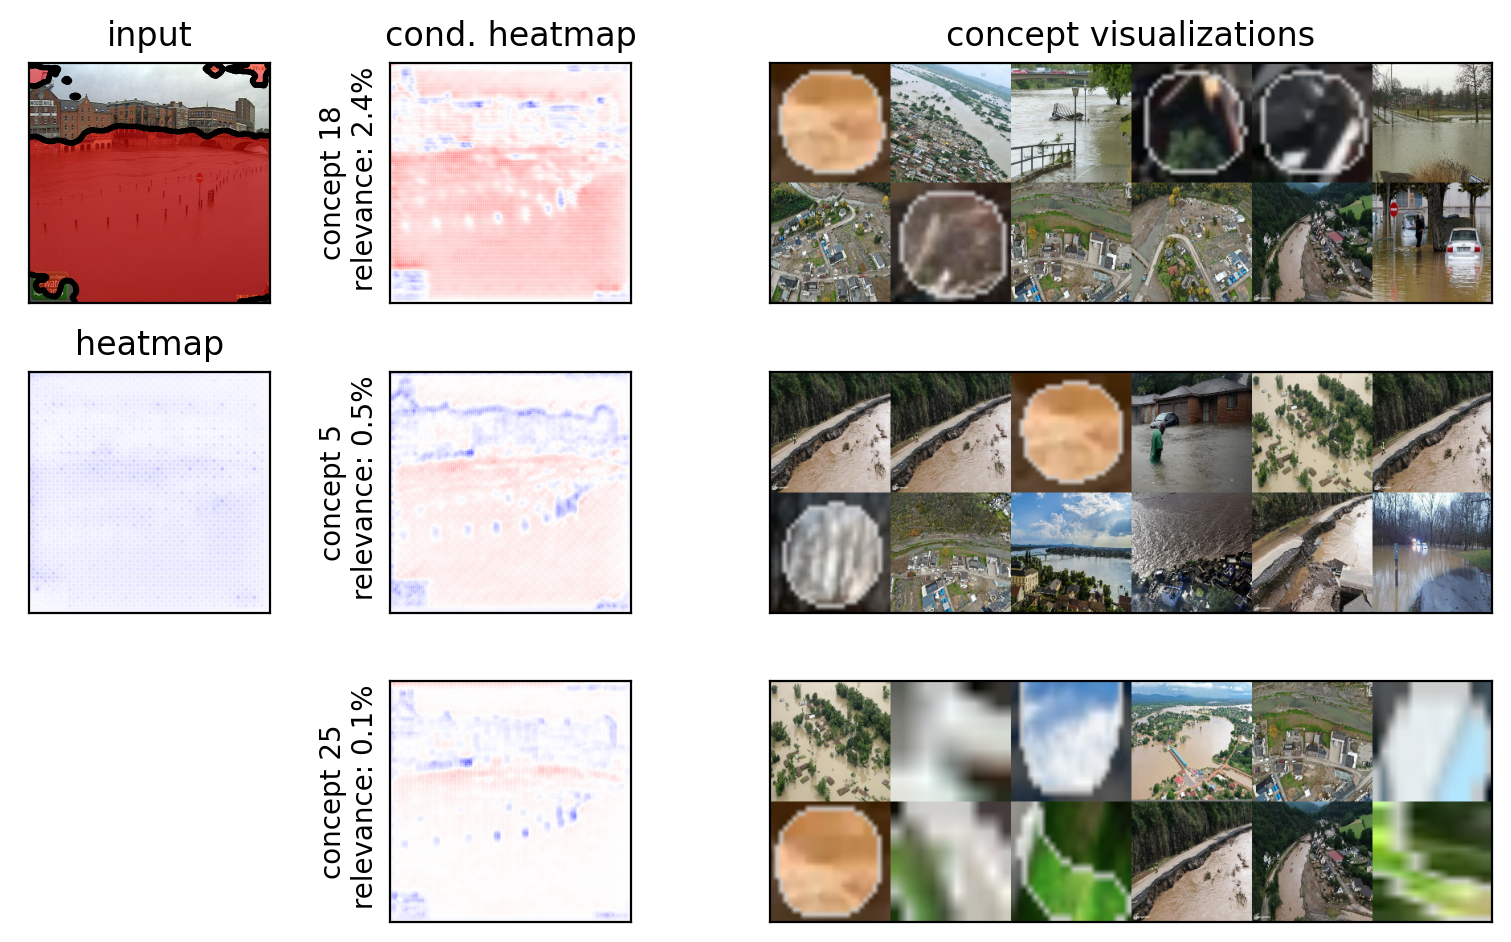

Done plotting.


In [7]:
# Setting up main parameters
class_id = 1
sample_id = 0
n_concepts = 3
n_refimgs = 12
layer = "layer1.1.conv1"
mode = "relevance"
prediction_num = 0

# if failing, try to restart the notebook and do not run analysis again, go directly to plotting
plot_explanations(model_name, model, dataset, sample_id, class_id, layer, prediction_num, mode, n_concepts, n_refimgs, output_dir=output_dir)